In [8]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots
import pandas as pd
from pandas import DataFrame
salaries_df = pd.read_csv('ds_salaries.csv')

In [6]:
salaries_df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [7]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [9]:
salaries_df.isna().apply(pd.value_counts)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
False,607,607,607,607,607,607,607,607,607,607,607,607


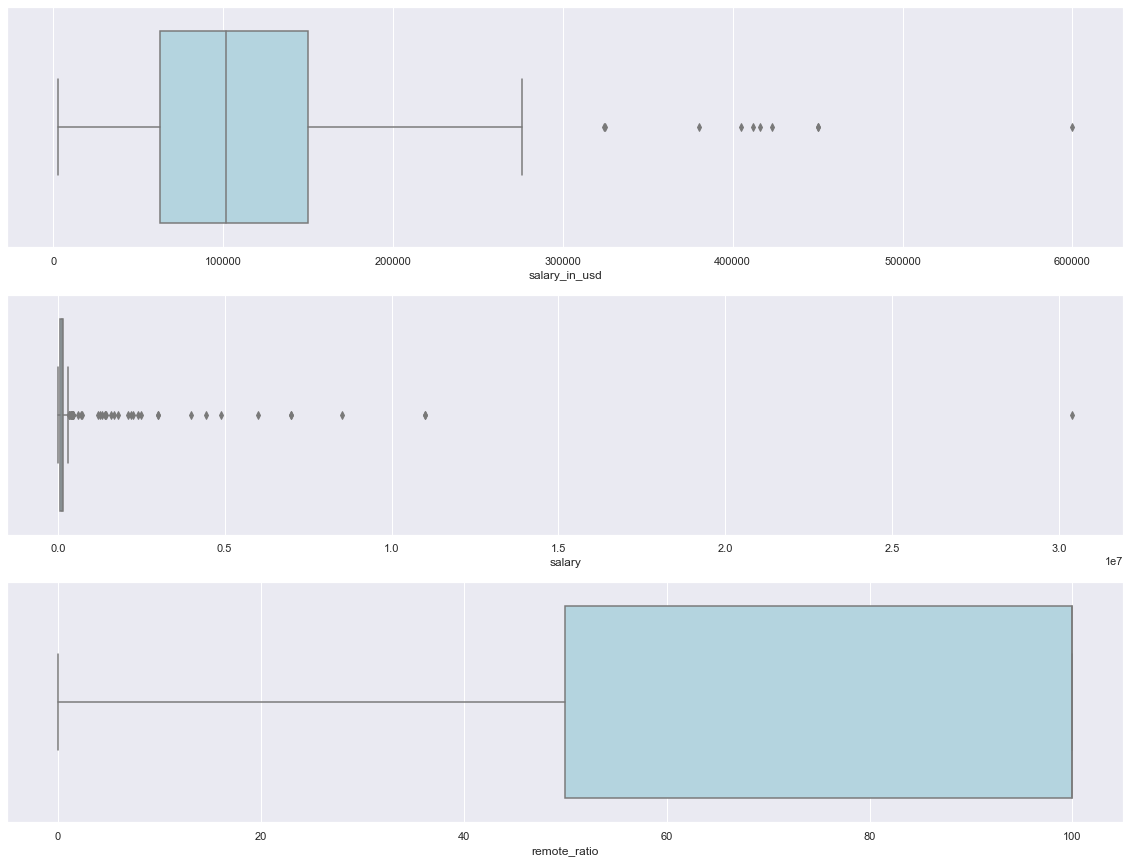

In [13]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= salaries_df.salary_in_usd, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= salaries_df.salary, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= salaries_df.remote_ratio, color='lightblue')

plt.show()

In [14]:
salaries_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


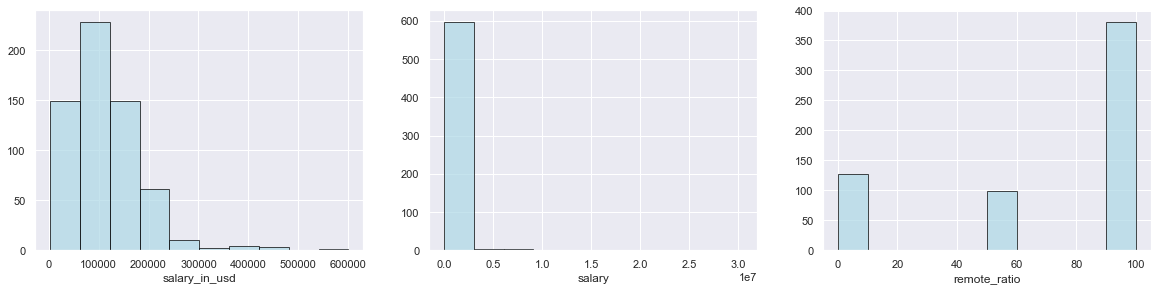

In [15]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(salaries_df.salary_in_usd, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('salary_in_usd')

plt.subplot(3,3,2)
plt.hist(salaries_df.salary, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('salary')

plt.subplot(3,3,3)
plt.hist(salaries_df.remote_ratio, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('remote_ratio')

plt.show()

In [17]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(salaries_df.salary),stats.skew(salaries_df.salary_in_usd),stats.skew(salaries_df.remote_ratio)]},
                        index=['salary','salary_in_usd','remote_ratio'])  # Measure the skeweness of the required columns
Skewness

,Skewness
salary,14.018164
salary_in_usd,1.663421
remote_ratio,-0.901988


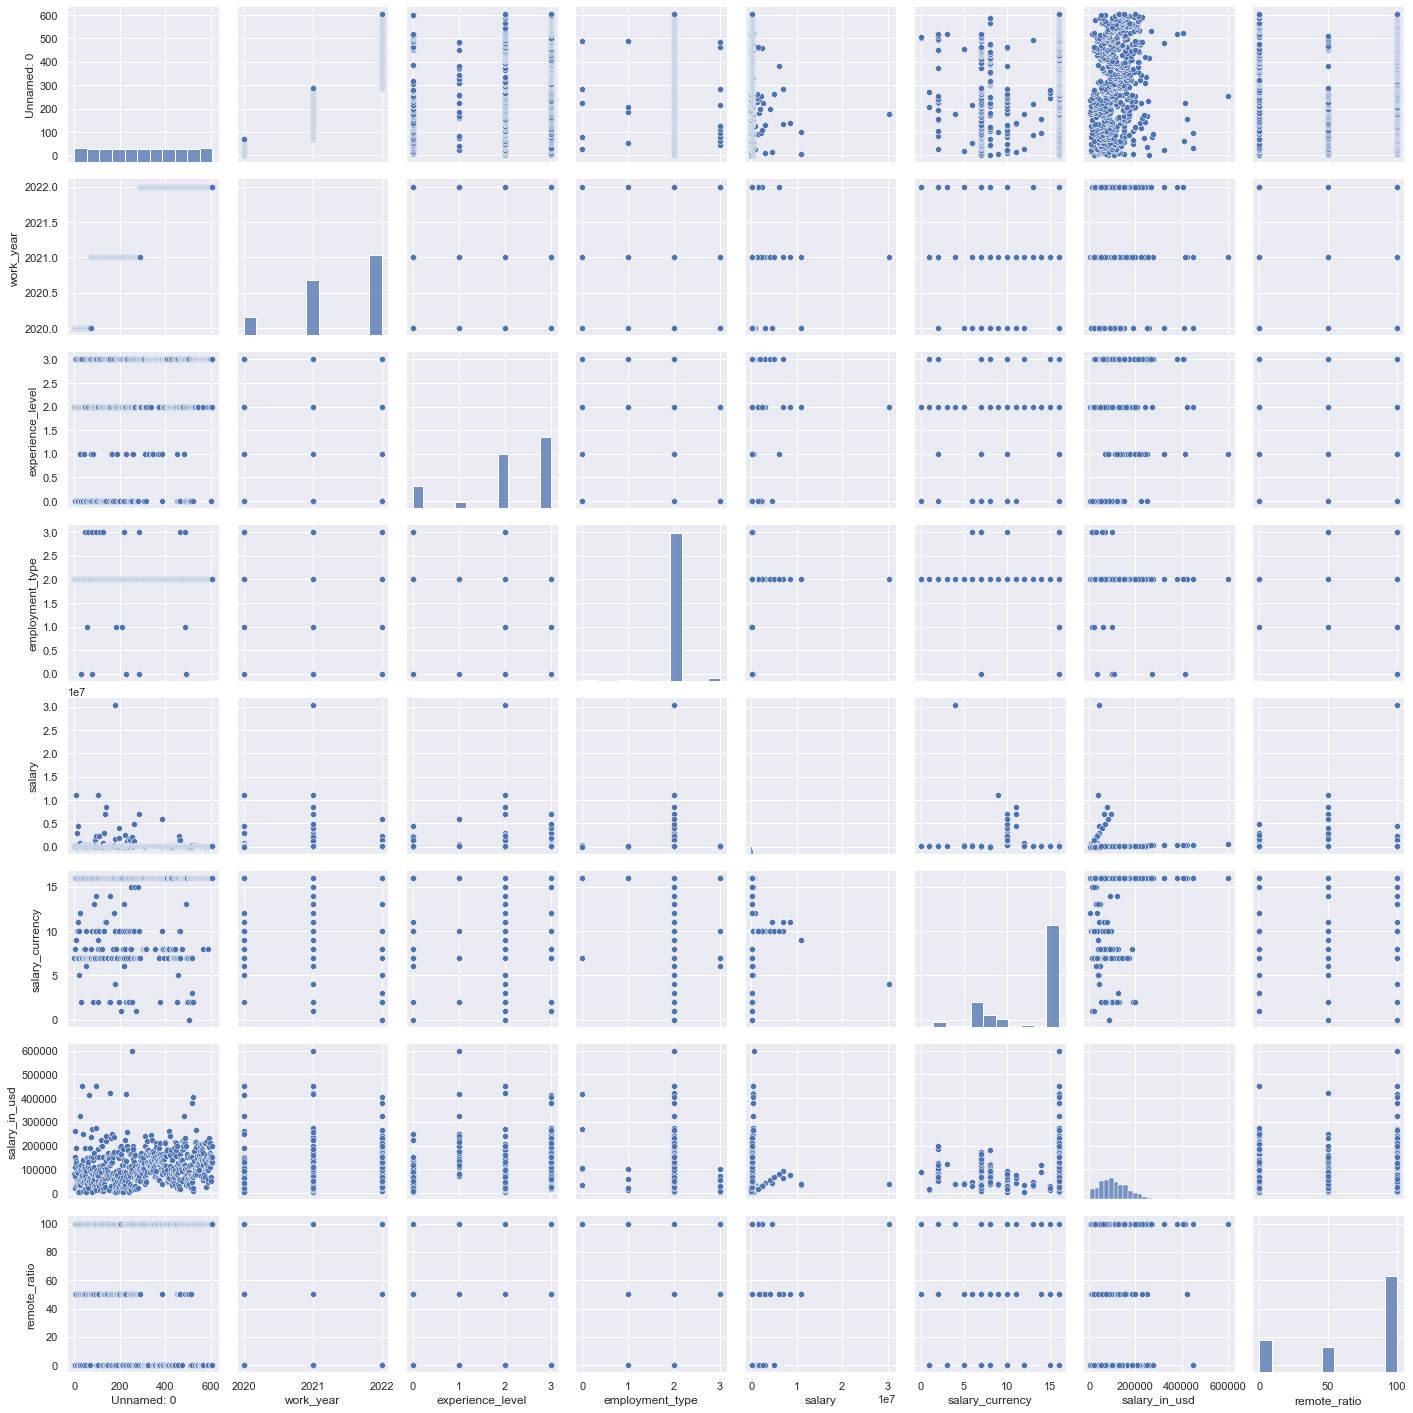

In [21]:
salaries_df_encoded = copy.deepcopy(salaries_df)
salaries_df_encoded.loc[:,['employment_type', 'salary_currency', 'experience_level']] = insurance_df_encoded.loc[:,['employment_type', 'salary_currency', 'experience_level']].apply(LabelEncoder().fit_transform) 
sns.pairplot(salaries_df_encoded)  #pairplot
plt.show()

In [27]:
salaries_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [26]:
salaries_df_encoded.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,Data Scientist,70000,7,79833,DE,0,DE,L
1,1,2020,3,2,Machine Learning Scientist,260000,16,260000,JP,0,JP,S
2,2,2020,3,2,Big Data Engineer,85000,8,109024,GB,50,GB,M
3,3,2020,2,2,Product Data Analyst,20000,16,20000,HN,0,HN,S
4,4,2020,3,2,Machine Learning Engineer,150000,16,150000,US,50,US,L
